# 🎸 Exploratory Data Analysis: Most Streamed Spotify Songs 2023 🎸

This project presents an exploratory data analysis (EDA) of __Spotify's Most Streamed Songs of 2023__ dataset. It covers _data cleaning, descriptive statistics, visualizations,_ and _correlation analyses_ to identify patterns and insights on track popularity. The findings highlight trends in _musical attributes_ (e.g., BPM, danceability, and energy), _artist frequency,_ and _platform popularity._

Through this analysis, the project aims to provide a deeper understanding of the factors contributing to a song's popularity and key trends in popular music for 2023.

---

### Loading the Data

The [dataset](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023?resource=download), __Most Streamed Spotify Songs 2023__, comprises __953 tracks__ with detailed musical attributes like BPM, danceability, and popularity across platforms. Using `pandas`, we begin by loading and inspecting the `spotify-2023.csv` file, examining its structure, checking for missing values, and previewing a few rows. This setup prepares the data for a comprehensive analysis. You can see the function and its output below.

In [1149]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# Display the first and last 5 rows to get an overview
pd.concat([df.head(), df.tail()])

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


---

### Overview of Dataset

In this section, we will address key questions regarding the dataset, including the number of rows and columns, the data types of each column, and any missing values present.

- How many rows and columns does the dataset contain?
- What are the data types of each column? Are there any missing values?

In [1152]:
# Display the number of rows and columns
rows, columns = df.shape
print("The dataset contains", rows, "rows and", columns, "columns.\n")

# Display the data types of each column with aligned formatting
data_types = df.dtypes

print("Column Data Types:")
for column, dtype in data_types.items():
    print("{:<30}: {}".format(column, dtype))

# Check for any missing values in the dataset
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

print("\nMissing Values in Each Column:")
for column, count in missing_values.items():
    print("{:<30}: {}".format(column, count))

The dataset contains 953 rows and 24 columns.

Column Data Types:
track_name                    : object
artist(s)_name                : object
artist_count                  : int64
released_year                 : int64
released_month                : int64
released_day                  : int64
in_spotify_playlists          : int64
in_spotify_charts             : int64
streams                       : object
in_apple_playlists            : int64
in_apple_charts               : int64
in_deezer_playlists           : object
in_deezer_charts              : int64
in_shazam_charts              : object
bpm                           : int64
key                           : object
mode                          : object
danceability_%                : int64
valence_%                     : int64
energy_%                      : int64
acousticness_%                : int64
instrumentalness_%            : int64
liveness_%                    : int64
speechiness_%                 : int64

Missing Values

In [1153]:
# Fill missing values with zero
df.fillna(0, inplace=True)

---

### Basic Descriptive Statistics

This section aims to provide insights into the dataset by calculating key statistical metrics for the streams column, which will help us understand track popularity. Furthermore, we will explore the distributions of released_year and artist_count to uncover patterns and potential anomalies in the data.

- What are the mean, median, and standard deviation of the streams column?
- What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

Mean: 514,137,425
Median: 290,530,915
Standard Deviation: 566,856,949


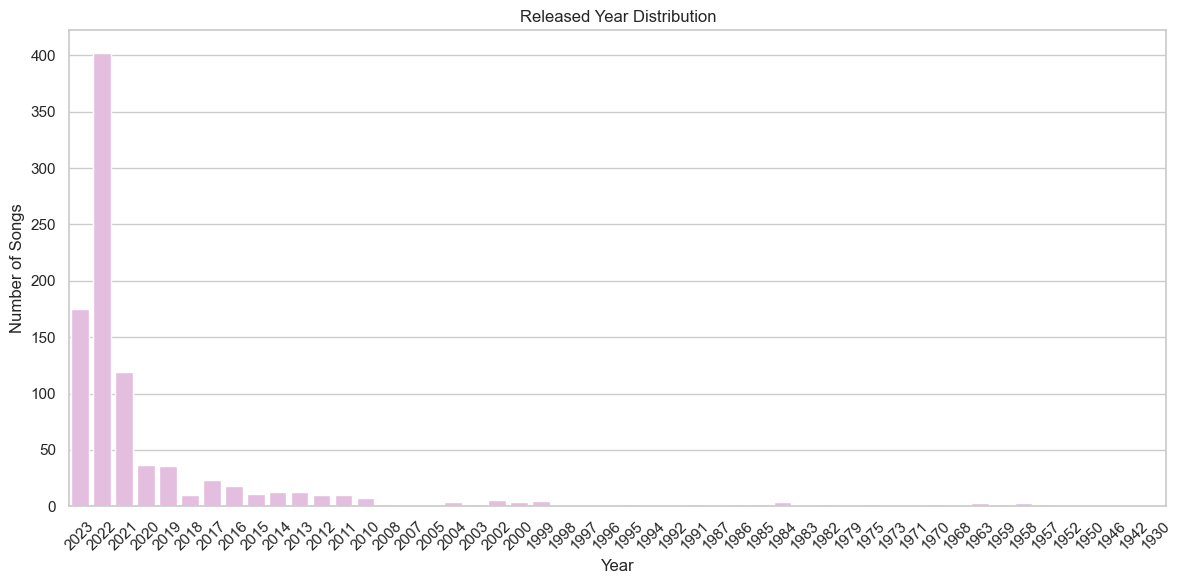

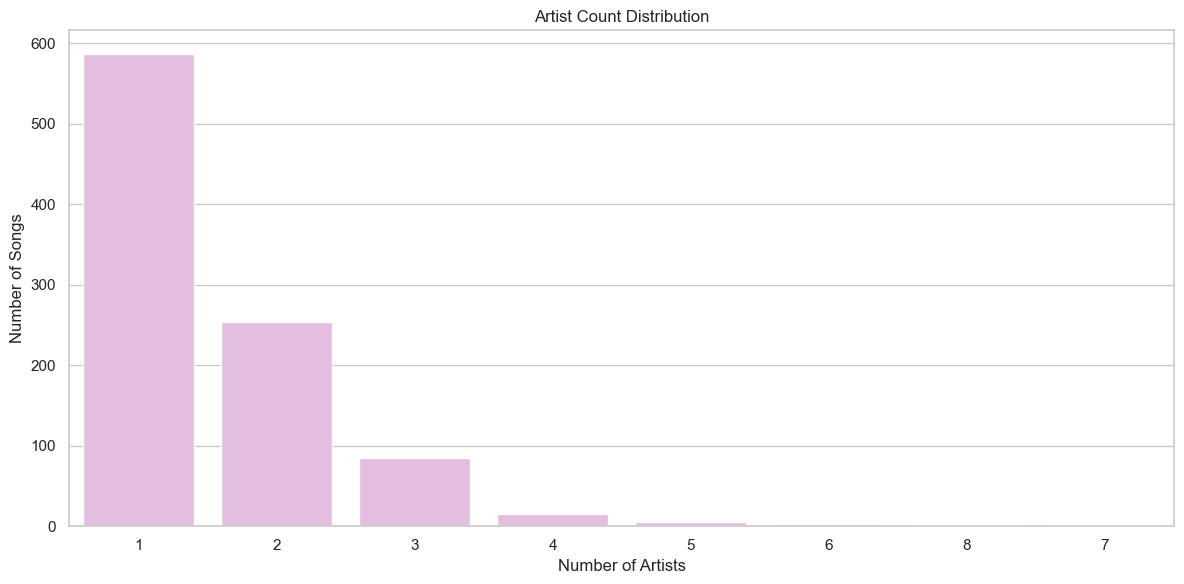

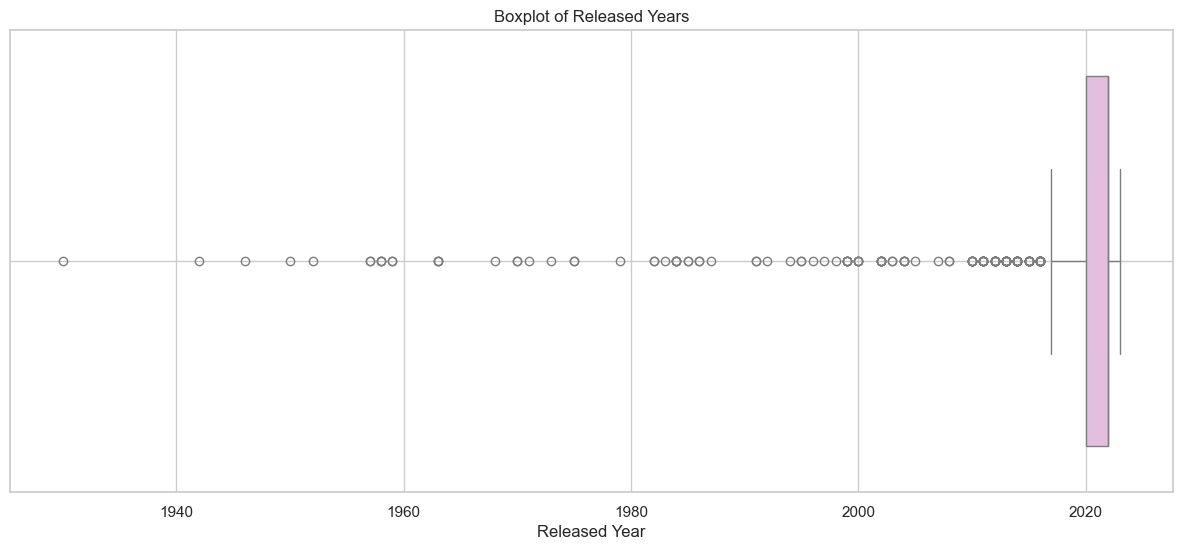

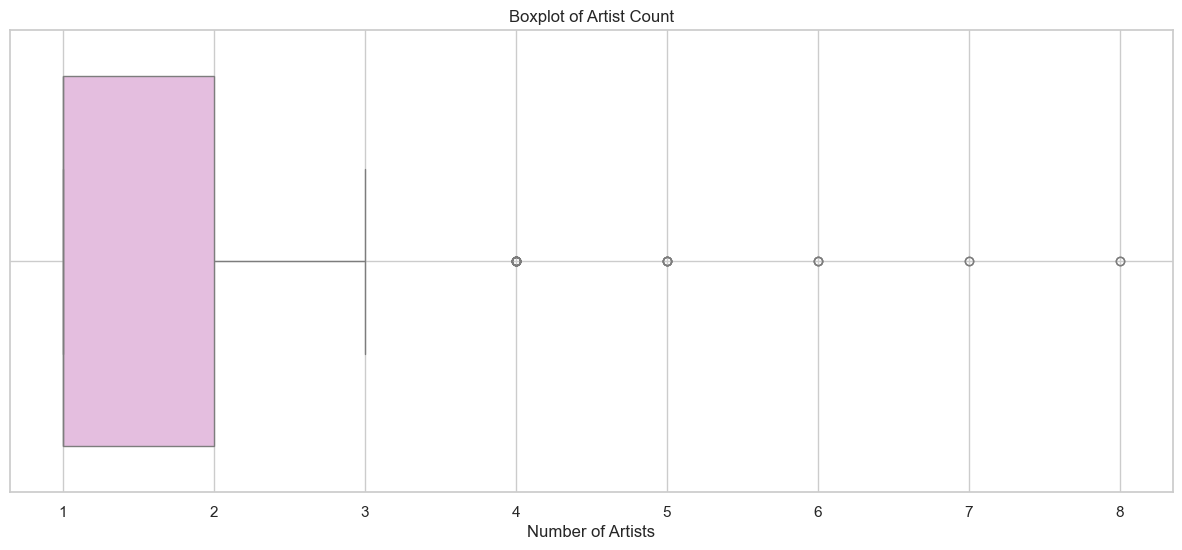

Released Year: 151 outliers, Range: (1930, 2016)
Artist Count: 27 outliers, Range: (4, 8)


In [1156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert streams to numeric, forcing errors to NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Calculate mean, median, and standard deviation for the streams column
mean_streams = df['streams'].mean()
median_streams = df['streams'].median()
std_streams = df['streams'].std()

# Display the results with comma formatting
print("Mean:", "{:,.0f}".format(mean_streams))
print("Median:", "{:,.0f}".format(median_streams))
print("Standard Deviation:", "{:,.0f}".format(std_streams))

# Set the style of seaborn
sns.set(style="whitegrid")

# Released Year Distribution starting from 2023
plt.figure(figsize=(12, 6))
released_year_distribution = df['released_year'].value_counts().sort_index(ascending=True)  
sns.barplot(x=released_year_distribution.index, y=released_year_distribution.values, color='#EAB8E4')  
plt.title('Released Year Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.gca().invert_xaxis()  # Invert x-axis to show 2023 first
plt.tight_layout()
plt.show()

# Artist Count Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='artist_count', data=df, order=df['artist_count'].value_counts().index, color='#EAB8E4')  
plt.title('Artist Count Distribution')
plt.xlabel('Number of Artists')
plt.ylabel('Number of Songs')
plt.tight_layout()
plt.show()

# Boxplot for Released Year
plt.figure(figsize=(15, 6))
sns.boxplot(x=df['released_year'], color='#EAB8E4')
plt.title('Boxplot of Released Years')
plt.xlabel('Released Year')
plt.grid(axis='y')
plt.show()

# Boxplot for Artist Count
plt.figure(figsize=(15, 6))
sns.boxplot(x=df['artist_count'], color='#EAB8E4')
plt.title('Boxplot of Artist Count')
plt.xlabel('Number of Artists')
plt.grid(axis='y')
plt.show()

# Summary of Outliers
def summarize_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    num_outliers = outliers.count()
    outlier_range = (outliers.min(), outliers.max())
    
    return num_outliers, outlier_range

# Apply to 'released_year' and 'artist_count'
released_year_outliers = summarize_outliers(df, 'released_year')
artist_count_outliers = summarize_outliers(df, 'artist_count')

# Display summary
print("Released Year:", released_year_outliers[0], "outliers,", "Range:", released_year_outliers[1])
print("Artist Count:", artist_count_outliers[0], "outliers,", "Range:", artist_count_outliers[1])

---

### Top Performers

In this section, we analyze the performance of tracks within the dataset to identify standout songs and artists. By examining the total number of streams, we can pinpoint the track with the highest popularity. Additionally, we will investigate which artists frequently appear in the dataset, shedding light on the most prolific contributors to this collection of popular songs. This analysis will provide valuable insights into trends in music consumption and artist visibility. You can see the function and its output below.

- Which track has the highest number of streams? Display the top 5 most streamed tracks.
- Who are the top 5 most frequent artists based on the number of tracks in the dataset?

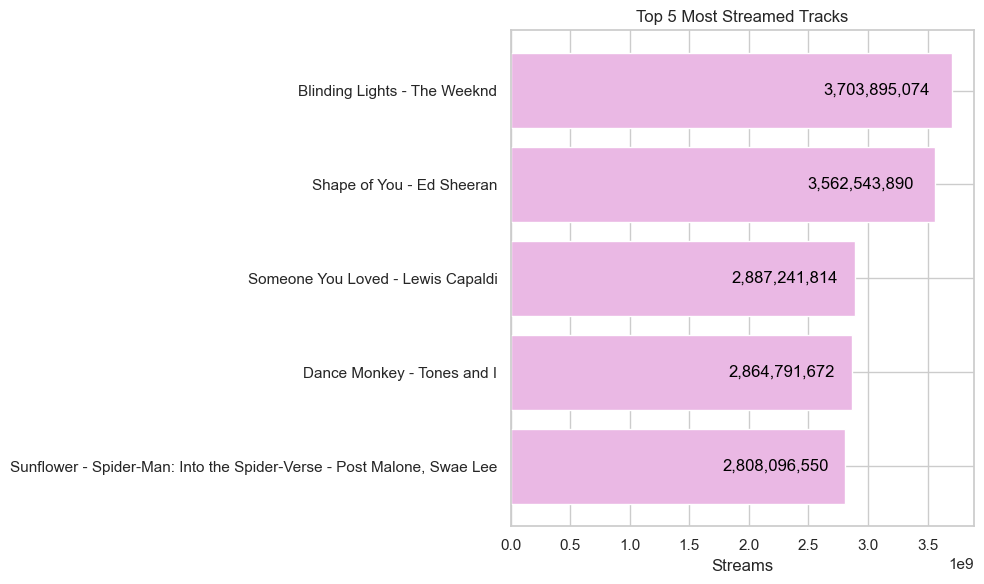

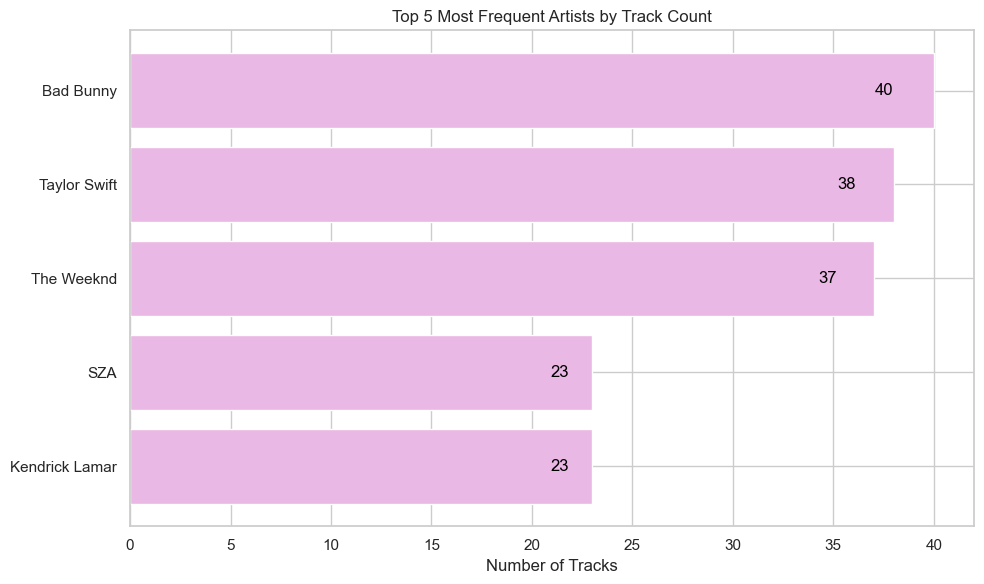

In [1159]:
# Sort and display the top 5 tracks by streams
top_tracks = df[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head()

# Combine track names and artist names for clearer labels
top_tracks['label'] = top_tracks['track_name'] + ' - ' + top_tracks['artist(s)_name']

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(top_tracks['label'], top_tracks['streams'], color='#EAB8E4')
plt.xlabel('Streams')
plt.title('Top 5 Most Streamed Tracks')
plt.gca().invert_yaxis()  # Highest streams at the top

# Add stream counts inside each bar
for bar, stream_count in zip(bars, top_tracks['streams']):
    plt.text(bar.get_width() - (bar.get_width() * 0.05),  # Position slightly left of bar end
             bar.get_y() + bar.get_height() / 2,
             f'{int(stream_count):,}', va='center', ha='right', color='black')

plt.tight_layout()
plt.show()

# Split the 'artist(s)_name' column, then "explode" to separate each artist into its own row
df['artist(s)_name'] = df['artist(s)_name'].str.split(',')
exploded_artists = df.explode('artist(s)_name')

# Remove any leading/trailing spaces and count occurrences of each artist
exploded_artists['artist(s)_name'] = exploded_artists['artist(s)_name'].str.strip()
top_artists = exploded_artists['artist(s)_name'].value_counts().head(5)

# Plot the bar graph for the top 5 most frequent artists
plt.figure(figsize=(10, 6))
artist_bars = plt.barh(top_artists.index, top_artists.values, color='#EAB8E4')
plt.xlabel('Number of Tracks')
plt.title('Top 5 Most Frequent Artists by Track Count')
plt.gca().invert_yaxis()

# Add track counts inside each bar
for bar, track_count in zip(artist_bars, top_artists.values):
    plt.text(bar.get_width() - (bar.get_width() * 0.05),  # Position near the end of each bar
             bar.get_y() + bar.get_height() / 2,
             f'{track_count}', va='center', ha='right', color='black')

plt.tight_layout()
plt.show()

---

### Temporal Trends

This section focuses on analyzing temporal trends in the dataset, specifically examining the annual and monthly release patterns of tracks. By plotting the number of tracks released over time, we aim to identify any significant trends or fluctuations in the music landscape. Additionally, we will explore whether certain months see a higher volume of releases, helping to uncover patterns that may inform us about industry dynamics and seasonal variations in music production. You can see the function and output below.

- Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
- Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

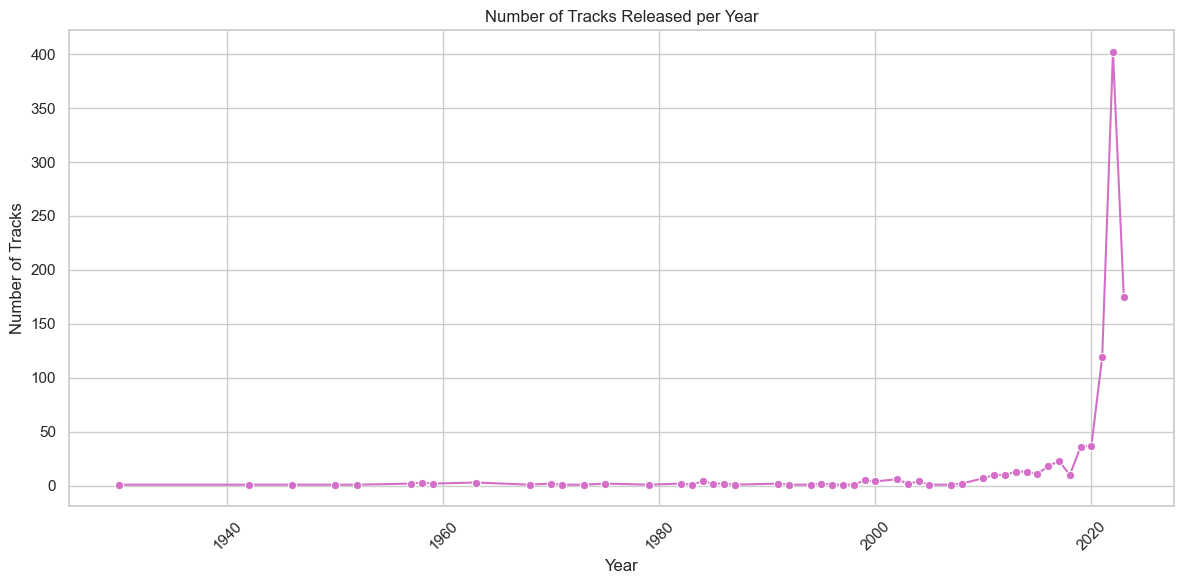

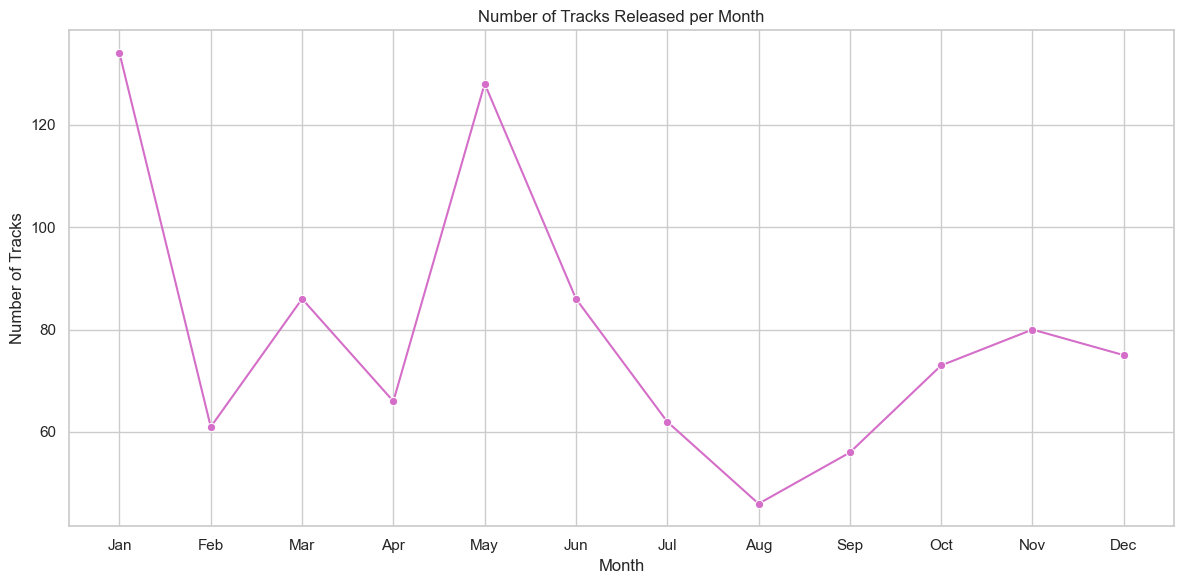

In [1162]:
# Load the dataset
# df = pd.read_csv('your_dataset.csv') # Uncomment and adjust this line to load your dataset

# Ensure the 'released_year' and 'released_month' columns are of the correct data type
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce')
df['released_month'] = pd.to_numeric(df['released_month'], errors='coerce')

# Count the number of tracks released per year
tracks_per_year = df['released_year'].value_counts().sort_index()

# Plot the number of tracks released per year
plt.figure(figsize=(12, 6))
sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values, marker='o', color='#d46ec8')
plt.title('Number of Tracks Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ensure 'released_month' is integer-type for sorting and grouping
df['released_month'] = pd.to_numeric(df['released_month'], errors='coerce').fillna(0).astype(int)

# Count tracks by month
tracks_per_month = df['released_month'].value_counts().sort_index()

# Plotting the results
plt.figure(figsize=(12, 6))
sns.lineplot(x=tracks_per_month.index, y=tracks_per_month.values, marker='o', color='#d46ec8')
plt.title('Number of Tracks Released per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

---

### Genre and Music Characteristics

In this section, we will explore the relationships between the number of streams and various musical attributes, such as beats per minute (bpm), danceability percentage, and energy percentage. We will assess which of these attributes most significantly influences streaming numbers. Additionally, we will investigate the correlation between danceability and energy, as well as between valence and acousticness, to understand how these musical characteristics interact with each other. You can see the function and output below.

- Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
- Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

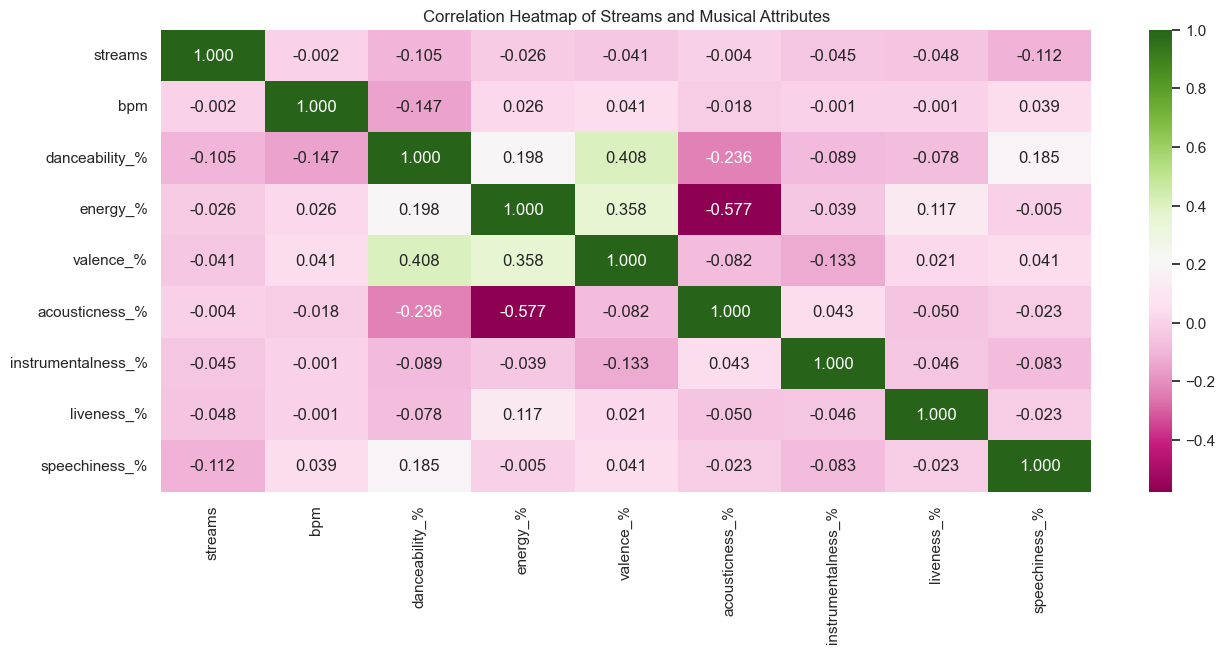

In [1165]:
# Calculate the correlation matrix
correlation_matrix = df[['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 
                  'liveness_%','speechiness_%']].corr()

# Create a heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='PiYG')
plt.title('Correlation Heatmap of Streams and Musical Attributes')
plt.show()

---

### Platform Popularity

In this section, we will analyze the popularity of tracks across different music streaming platforms: Spotify, Deezer, and Apple Music. By comparing the number of tracks listed on these platforms, we can identify trends in platform usage and determine which platform tends to feature the most popular tracks. This analysis will provide insights into user preferences and the distribution of music across these major streaming services. You can see the function and output below.

- How do the numbers of tracks in spotify_playlists, deezer_playlist, and apple_playlists compare? Which platform seems to favor the most popular tracks?

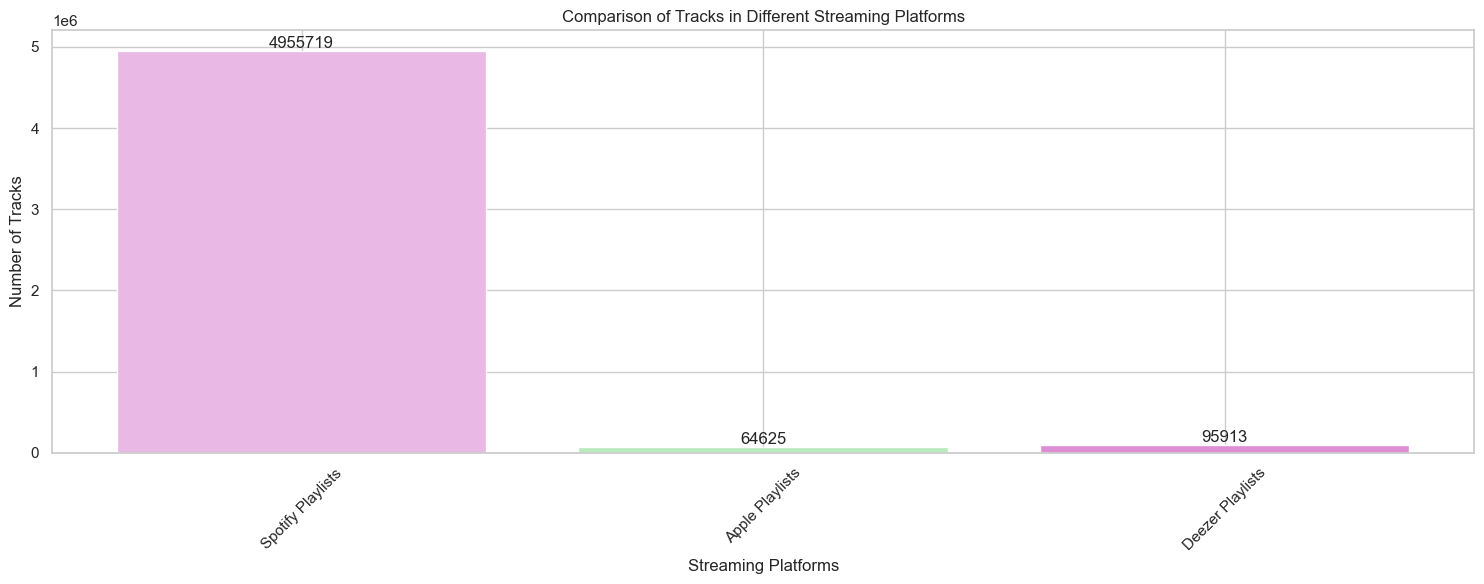

In [1168]:
# Define the platforms to sum
platforms = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']

# Sum the number of tracks for each platform, ensuring numeric conversion
track_counts = [pd.to_numeric(df[platform], errors='coerce').sum() for platform in platforms]

# Create the bar graph
plt.figure(figsize=(15, 6))
bars = plt.bar(platforms, track_counts, color=['#EAB8E4', '#B8EABE', '#dd8dd4'])

# Add labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Streaming Platforms')
plt.ylabel('Number of Tracks')
plt.title('Comparison of Tracks in Different Streaming Platforms')

# Define new labels for the x-axis
new_labels = ['Spotify Playlists', 'Apple Playlists', 'Deezer Playlists']

plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=45)  # Use new labels for easier understanding and readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

### Advanced Analysis

In this section, we will explore the relationship between musical elements such as key and mode (Major vs. Minor) with streaming patterns, particularly focusing on the popularity of tracks. Additionally, we will investigate whether specific genres or artists are more prevalent in playlists and charts. By analyzing the data, we aim to uncover any consistent trends or notable differences among the most frequently appearing artists across various streaming platforms. This analysis will provide insights into how musical characteristics and artist popularity influence listener engagement. You can see the function and output below.

- Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
- Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

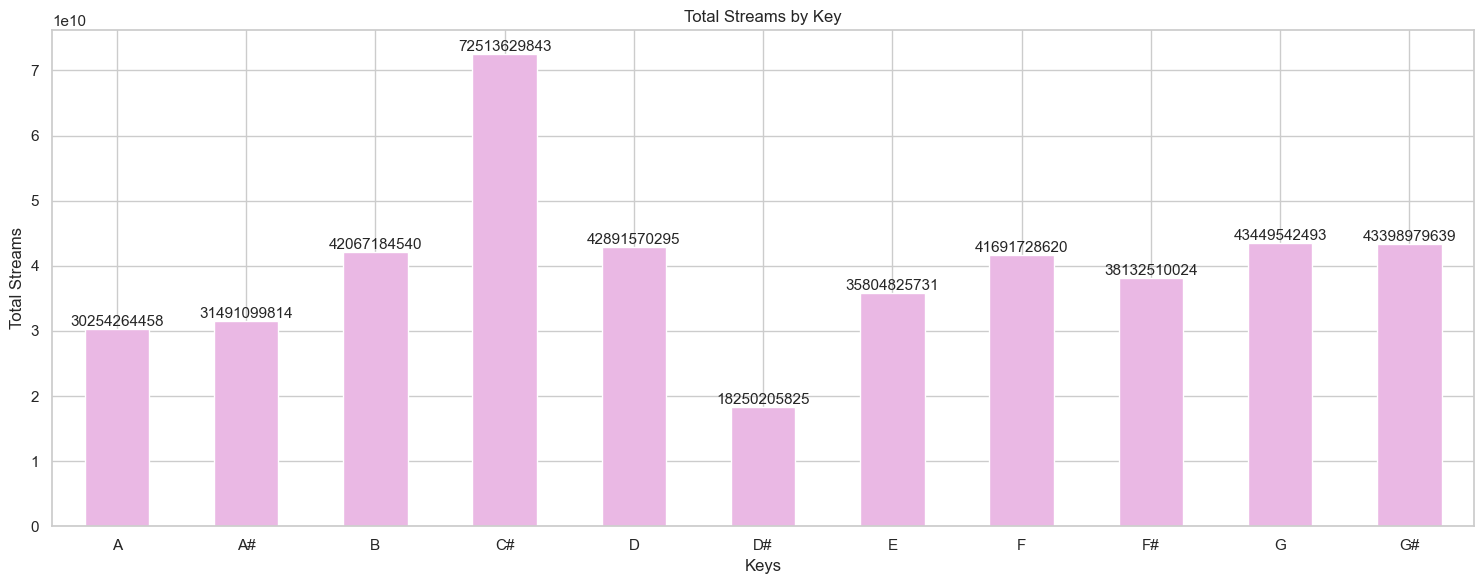

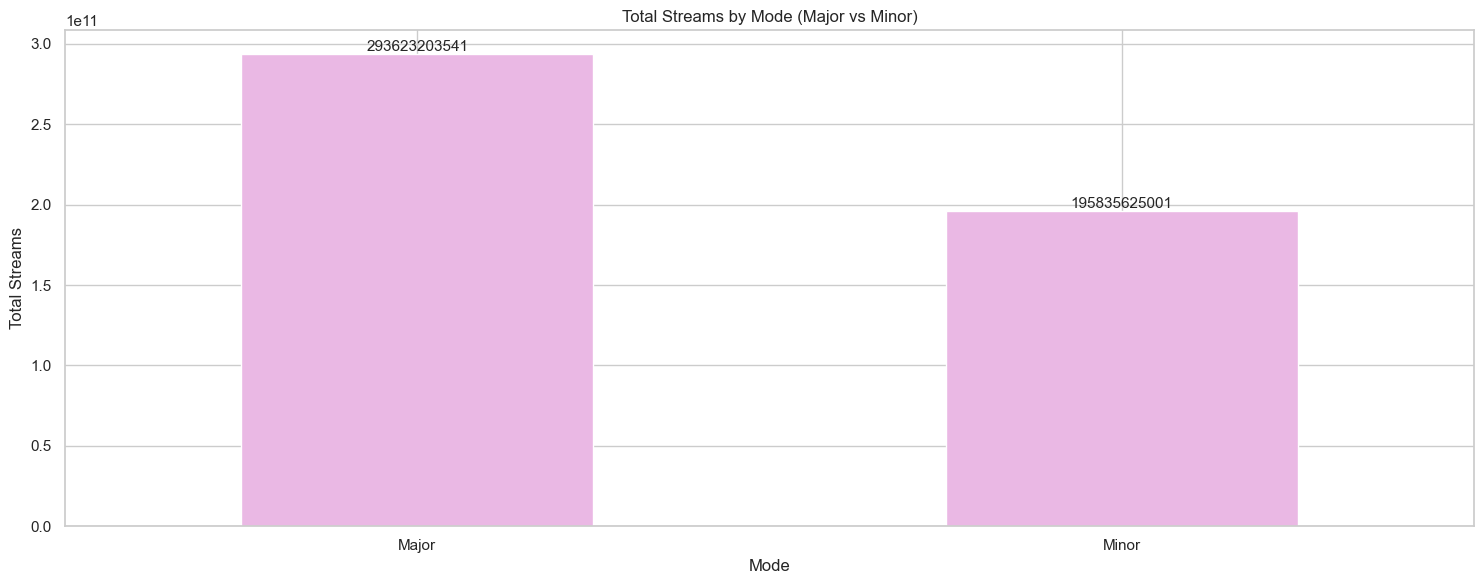

In [1171]:
# Group the data by key and sum the streams
key_counts = df.groupby('key')['streams'].sum()

# Arrange keys including sharps
key_order = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
key_counts = key_counts.reindex(key_order)

# Filter out zero counts
key_counts = key_counts[key_counts > 0]

# Create a bar graph for key vs streams
plt.figure(figsize=(15, 6))
bars = key_counts.plot(kind='bar', color='#EAB8E4', alpha=1)
plt.title('Total Streams by Key')
plt.xlabel('Keys')
plt.ylabel('Total Streams')
plt.xticks(rotation=0)

# Add the value of each bar, excluding zeros
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             round(bar.get_height()), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# Group the data by mode (Major vs Minor) and sum the streams, excluding zeros
mode_counts = df.groupby('mode')['streams'].sum()

# Create a bar graph for mode vs streams
plt.figure(figsize=(15, 6))
bars_mode = mode_counts[mode_counts > 0].plot(kind='bar', color='#EAB8E4', alpha=1)
plt.title('Total Streams by Mode (Major vs Minor)')
plt.xlabel('Mode')
plt.ylabel('Total Streams')
plt.xticks(rotation=0)

# Add the value of each bar, excluding zeros
for bar in bars_mode.patches:
    if bar.get_height() > 0:  # Only add text for bars greater than 0
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                 round(bar.get_height()), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

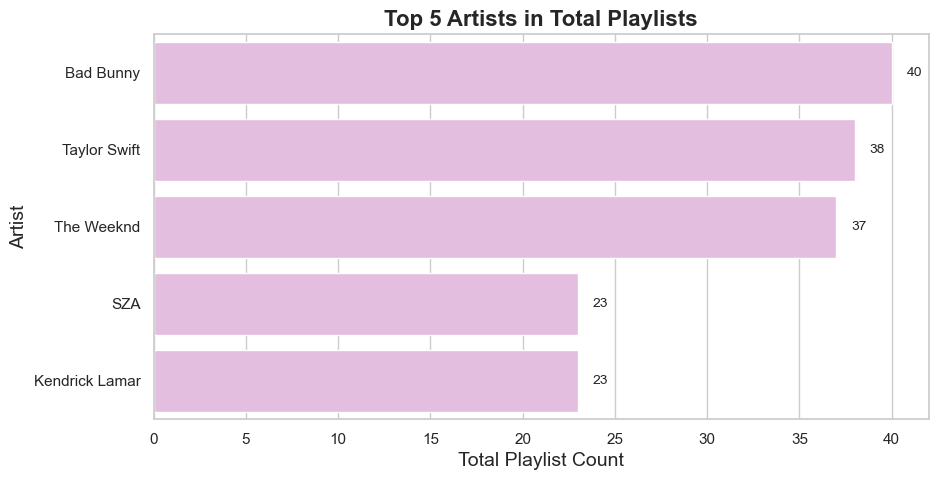

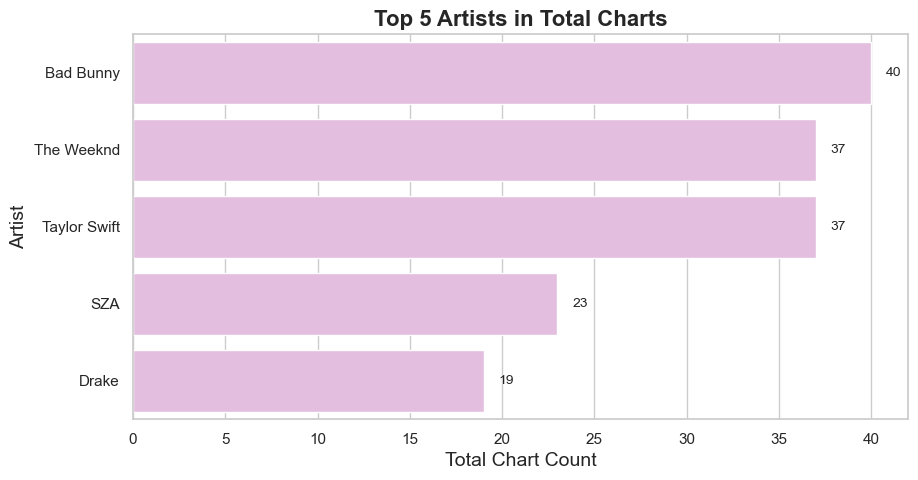

In [1172]:
# Load the CSV file with appropriate encoding
file_path = 'spotify-2023.csv' 
df = pd.read_csv(file_path, encoding='latin1')

# Define the relevant columns
artist_column = 'artist(s)_name'
playlist_columns = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
chart_columns = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']

# Ensure that the artist column is treated as a string and handle missing values
df[artist_column] = df[artist_column].fillna('').astype(str)

# Convert playlist and chart columns to numeric, filling errors with zero
for col in playlist_columns + chart_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Mark rows as playlist or chart entries based on whether they have non-zero counts in playlist or chart columns
df['is_playlist'] = df[playlist_columns].sum(axis=1) > 0
df['is_chart'] = df[chart_columns].sum(axis=1) > 0

# Separate and count artists for playlists
playlist_artist_counts = (
    df[df['is_playlist']][artist_column]
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .head(5)
)

# Separate and count artists for charts
chart_artist_counts = (
    df[df['is_chart']][artist_column]
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .head(5)
)

# Set color for consistency
color_code = '#EAB8E4'

# Plotting the data for playlists
plt.figure(figsize=(10, 5))
sns.barplot(x=playlist_artist_counts.values, y=playlist_artist_counts.index, color=color_code)
plt.xlabel('Total Playlist Count', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.title('Top 5 Artists in Total Playlists', fontsize=16, fontweight='semibold')
for i, v in enumerate(playlist_artist_counts):
    plt.text(v + 0.02 * max(playlist_artist_counts), i, f"{v:,}", va='center', fontsize=10)
plt.show()

# Plotting the data for charts
plt.figure(figsize=(10, 5))
sns.barplot(x=chart_artist_counts.values, y=chart_artist_counts.index, color=color_code)
plt.xlabel('Total Chart Count', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.title('Top 5 Artists in Total Charts', fontsize=16, fontweight='semibold')
for i, v in enumerate(chart_artist_counts):
    plt.text(v + 0.02 * max(chart_artist_counts), i, f"{v:,}", va='center', fontsize=10)
plt.show()